In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Breast Cancer Prediction.csv')

# Display the first few rows
print(data.head())


   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1       

In [2]:
# Check for missing values
print(data.isnull().sum())

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [3]:
# Drop 'Sample code number' as it's just an identifier
X = data.drop(['Sample code number', 'Class'], axis=1)

# Target variable
y = data['Class']

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                       Feature  Importance
1      Uniformity of Cell Size    0.336821
2     Uniformity of Cell Shape    0.234638
5                  Bare Nuclei    0.153507
7              Normal Nucleoli    0.072855
6              Bland Chromatin    0.071070
0              Clump Thickness    0.045657
3            Marginal Adhesion    0.042269
4  Single Epithelial Cell Size    0.034877
8                      Mitoses    0.008307


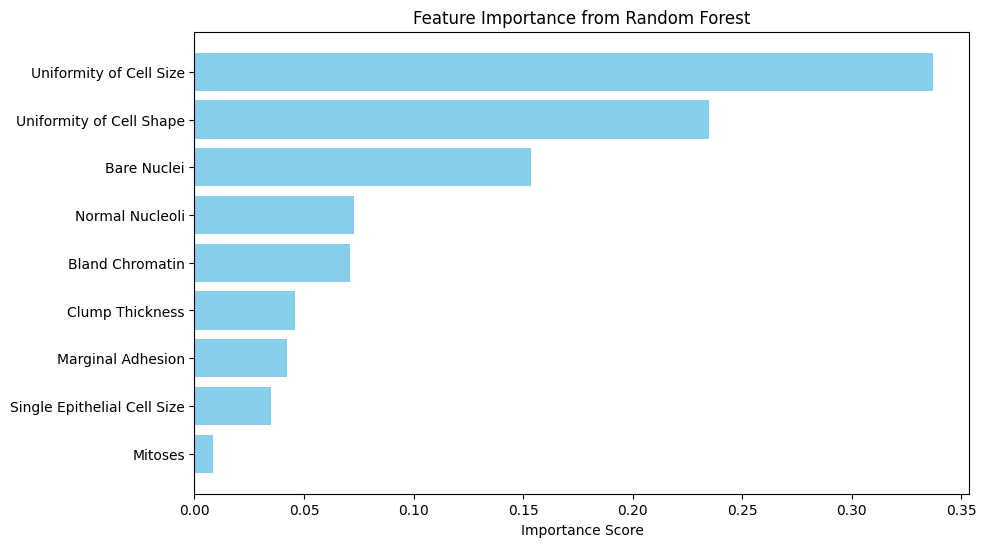

In [7]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9512195121951219

Classification Report:
               precision    recall  f1-score   support

           2       0.94      0.98      0.96       127
           4       0.97      0.90      0.93        78

    accuracy                           0.95       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [9]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.93430657 0.94890511 0.97080292 0.98529412 0.98529412]
Mean CV score: 0.9649205667668527


Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Extract coefficients
coefficients = log_model.coef_[0]

# Create a DataFrame for comparison
log_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

# Display coefficients
print(log_feature_importance)

                       Feature  Importance
5                  Bare Nuclei    1.513283
0              Clump Thickness    1.185655
6              Bland Chromatin    1.033691
8                      Mitoses    0.745703
2     Uniformity of Cell Shape    0.708695
3            Marginal Adhesion    0.601232
7              Normal Nucleoli    0.522136
1      Uniformity of Cell Size    0.184572
4  Single Epithelial Cell Size    0.021981


XGBoost

In [11]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

# Create a mapping dictionary
class_mapping = {2: 0, 4: 1}

# Apply the mapping to 'y_train'
y_train_mapped = y_train.map(class_mapping)

# Train an XGBoost classifier with the mapped target variable
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train_mapped) # Use the mapped y_train

# Extract feature importances
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame for comparison
xgb_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print(xgb_feature_importance)

                       Feature  Importance
1      Uniformity of Cell Size    0.645192
5                  Bare Nuclei    0.114134
2     Uniformity of Cell Shape    0.099589
0              Clump Thickness    0.035559
8                      Mitoses    0.028364
6              Bland Chromatin    0.027590
4  Single Epithelial Cell Size    0.021509
3            Marginal Adhesion    0.014975
7              Normal Nucleoli    0.013088


Comparing Feature importance across model

In [12]:
# Create a DataFrame to store feature importances from all models
feature_importance_comparison = pd.DataFrame({'Feature': feature_names})

# Add feature importances from each model
feature_importance_comparison['Random Forest'] = feature_importance_df['Importance']
feature_importance_comparison['Logistic Regression'] = log_feature_importance['Importance']
feature_importance_comparison['XGBoost'] = xgb_feature_importance['Importance']

# Display the comparison table
print(feature_importance_comparison)

#Save dataframe to csv
feature_importance_comparison.to_csv('feature_importance_comparison.csv', index=False)

                       Feature  Random Forest  Logistic Regression   XGBoost
0              Clump Thickness       0.045657             1.185655  0.035559
1      Uniformity of Cell Size       0.336821             0.184572  0.645192
2     Uniformity of Cell Shape       0.234638             0.708695  0.099589
3            Marginal Adhesion       0.042269             0.601232  0.014975
4  Single Epithelial Cell Size       0.034877             0.021981  0.021509
5                  Bare Nuclei       0.153507             1.513283  0.114134
6              Bland Chromatin       0.071070             1.033691  0.027590
7              Normal Nucleoli       0.072855             0.522136  0.013088
8                      Mitoses       0.008307             0.745703  0.028364


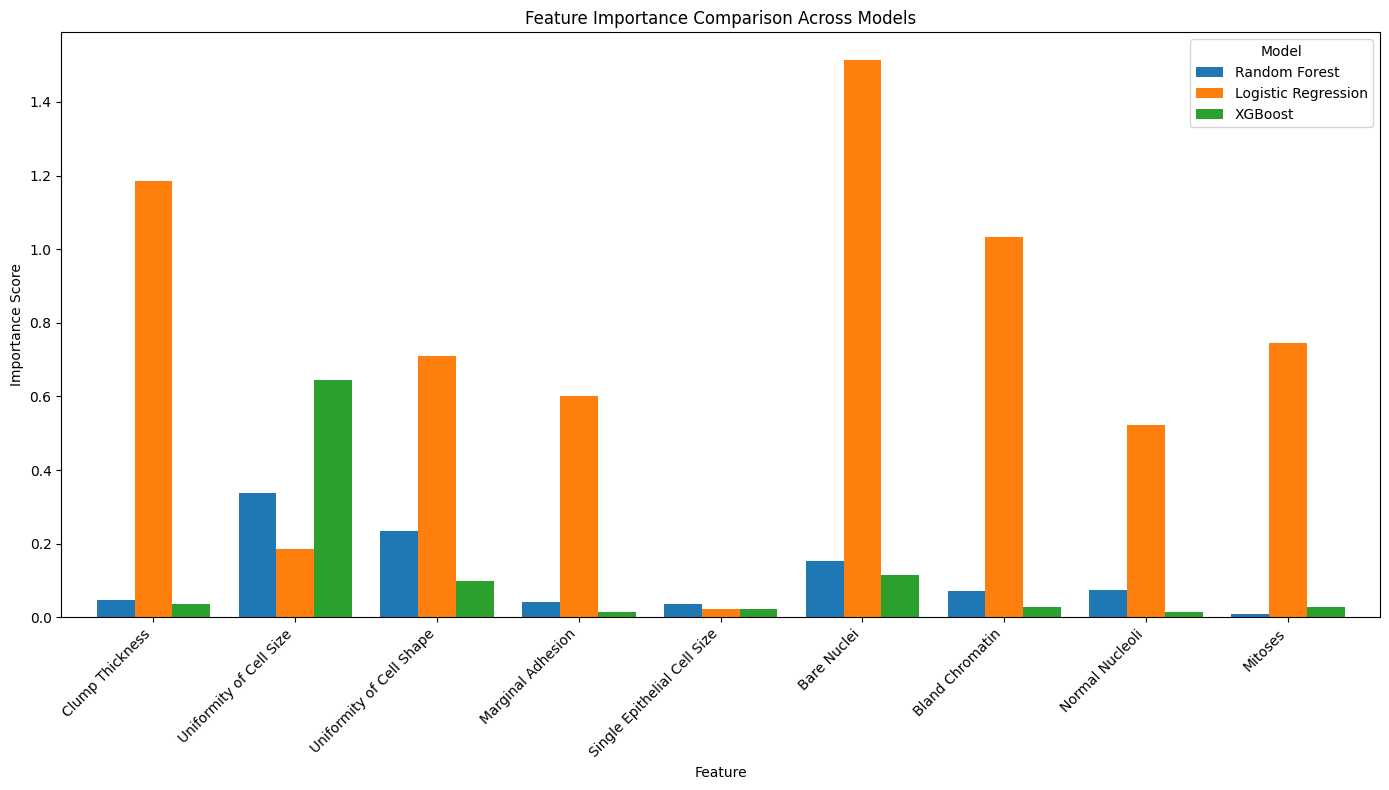

In [13]:
feature_importance_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': feature_importance_df['Importance'],
    'Logistic Regression': log_feature_importance['Importance'],
    'XGBoost': xgb_feature_importance['Importance']
})

# Set the Feature column as the index
feature_importance_comparison.set_index('Feature', inplace=True)

# Plot the feature importance
feature_importance_comparison.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Feature Importance Comparison Across Models')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [14]:
import matplotlib.pyplot as plt
plt.savefig('feature_importance_comparison.png')


<Figure size 640x480 with 0 Axes>

In [15]:
# Predict using the trained models
y_pred_rf = rf_model.predict(X_test)
y_pred_log = log_model.predict(X_test_scaled)

#For XGBoost, inverse transform the target variable
y_pred_xgb_mapped = xgb_model.predict(X_test)
y_pred_xgb = [list(class_mapping.keys())[list(class_mapping.values()).index(i)] for i in y_pred_xgb_mapped]

# Evaluate the models and print the accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy}")

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")

Random Forest Accuracy: 0.9512195121951219
Logistic Regression Accuracy: 0.9560975609756097
XGBoost Accuracy: 0.9560975609756097


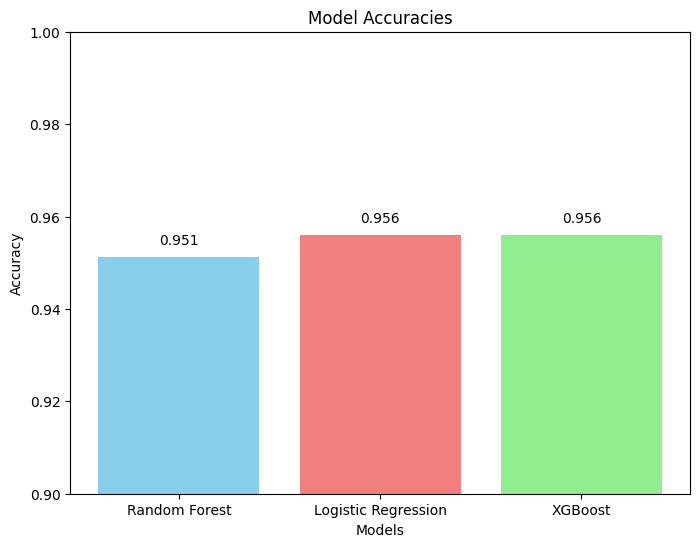

<Figure size 640x480 with 0 Axes>

In [17]:
# Create a dictionary to store the accuracies
accuracies = {
    'Random Forest': rf_accuracy,
    'Logistic Regression': log_accuracy,
    'XGBoost': xgb_accuracy
}

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization

# Add value labels on top of each bar
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center', va='bottom', fontsize=10)

plt.show()
plt.savefig('model_accuracies.png')